In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

/Users/Administrator/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Check data from Zeledo

In [8]:
def process_and_plot_wells(file_path, province_name):
    """
    Processes the groundwater dataset and plots unique wells for a specified province.

    Parameters:
    - file_path: Path to the CSV file.
    - province_name: Name of the province to filter and plot wells.
    """
    try:
        df = pd.read_csv(file_path, sep=';')

        filtered_df = df[(df['FILTER'].isin([1, 2])) & (df['JAAR'] > 2000)]
        cleaned_df = filtered_df.dropna(subset=['NO3_N'])
        province_df = cleaned_df[cleaned_df['PROVINCIE'] == province_name]

        if province_df.empty:
            print(f"No data found for province '{province_name}'. Check the name or data conditions.")
            return

        unique_wells = province_df.drop_duplicates(subset='BRO_GMW_ID')

        gdf_wells = gpd.GeoDataFrame(
            unique_wells,
            geometry=gpd.points_from_xy(unique_wells['XCOORDINAAT'], unique_wells['YCOORDINAAT']),
            crs="EPSG:28992"
        )

        fig, ax = plt.subplots(figsize=(8, 10))
        gdf_wells.to_crs(epsg=3857).plot(ax=ax, markersize=10, color='blue', alpha=0.7)

        ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
        ax.set_title(f'Wells in {province_name}')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

/var/folders/fr/h0n611t55y51b_mts5q50l540000gn/T/ipykernel_36581/2889128054.py:12: DtypeWarning: Columns (41,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';')


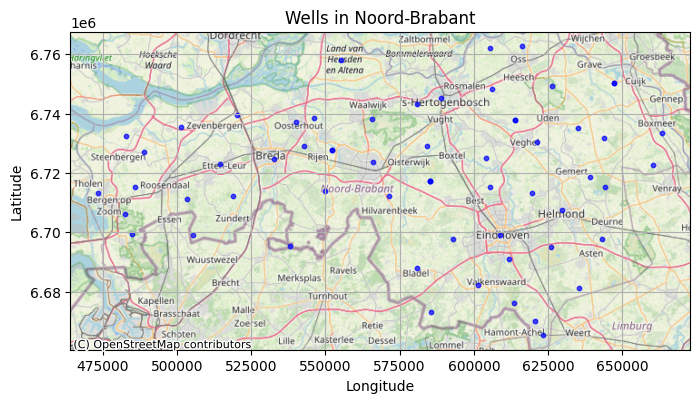

In [7]:
process_and_plot_wells('/Users/Administrator/Downloads/LMG_data_NIR_2024 (2).csv', 'Noord-Brabant')